In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fraud_check.csv')
data1 = data.copy()

In [3]:
data1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data1.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [6]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
data1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
data1.shape

(600, 6)

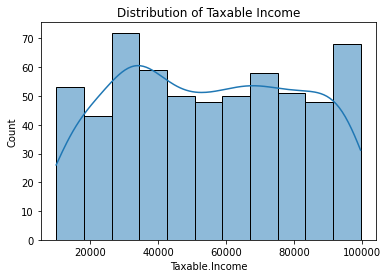

In [9]:
sns.histplot(data1['Taxable.Income'], kde=True)
plt.title('Distribution of Taxable Income')
plt.show()

Text(0.5, 1.0, 'Taxable Income')

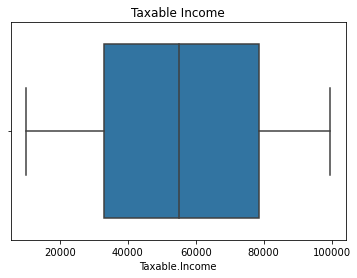

In [10]:
#outliers
sns.boxplot(x = data1['Taxable.Income'])
plt.title('Taxable Income')

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


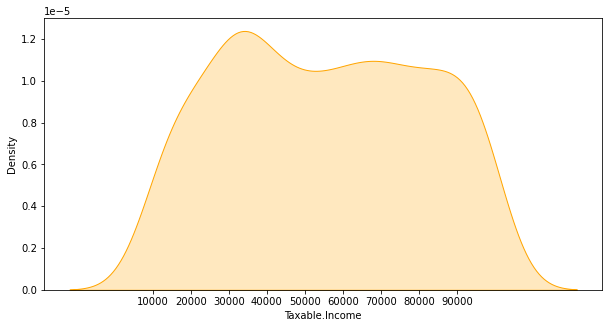

In [11]:
plt.figure(figsize=(10, 5))
print('Skew: {}'.format(data1['Taxable.Income']. skew()))
print('Kurtosis: {}'.format(data1['Taxable.Income'].kurtosis()))
a = sns.kdeplot(data1['Taxable.Income'], shade=True, color='orange')
plt.xticks([i for i in range(10000, 100000, 10000)])
plt.show()

In [12]:
cols = data1.select_dtypes(exclude='object').columns.tolist()

In [13]:
skewness = data1.skew()
Kurtosis = data1.kurtosis()

skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis':Kurtosis})
print(skew_kurt_df)

                 Skewness  Kurtosis
Taxable.Income   0.030015 -1.199782
City.Population  0.125009 -1.120154
Work.Experience  0.018529 -1.167524


In [14]:
data1 = pd.get_dummies(data1, columns = ['Undergrad','Marital.Status','Urban'])

In [15]:
p = data1.corr()
p

Taxable.Income  City.Population  Work.Experience  \
Taxable.Income                 1.000000        -0.064387        -0.001818   
City.Population               -0.064387         1.000000         0.013135   
Work.Experience               -0.001818         0.013135         1.000000   
Undergrad_NO                   0.049232        -0.079579         0.005362   
Undergrad_YES                 -0.049232         0.079579        -0.005362   
Marital.Status_Divorced        0.062099         0.004925        -0.014833   
Marital.Status_Married        -0.100611        -0.007035         0.033347   
Marital.Status_Single          0.037910         0.002087        -0.018123   
Urban_NO                      -0.070628         0.040098         0.094559   
Urban_YES                      0.070628        -0.040098        -0.094559   

                         Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  \
Taxable.Income               0.049232      -0.049232                 0.062099   
City.Population             -0.079579       0.079579                 0.004925   
Work.Experience              0.005362      -0.005362                -0.014833   
Undergrad_NO                 1.000000      -1.000000                 0.045101   
Undergrad_YES               -1.000000       1.000000                -0.045101   
Marital.Status_Divorced      0.045101      -0.045101                 1.000000   
Marital.Status_Married      -0.015120       0.015120                -0.468757   
Marital.Status_Single       -0.028883       0.028883                -0.510435   
Urban_NO                    -0.000267       0.000267                 0.065518   
Urban_YES                    0.000267      -0.000267                -0.065518   

                         Marital.Status_Married  Marital.Status_Single  \
Taxable.Income                        -0.100611               0.037910   
City.Population                       -0.007035               0.002087   
Work.Experience                        0.033347              -0.018123   
Undergrad_NO                          -0.015120              -0.028883   
Undergrad_YES                          0.015120               0.028883   
Marital.Status_Divorced               -0.468757              -0.510435   
Marital.Status_Married                 1.000000              -0.520317   
Marital.Status_Single                 -0.520317               1.000000   
Urban_NO                              -0.016771              -0.047014   
Urban_YES                              0.016771               0.047014   

                         Urban_NO  Urban_YES  
Taxable.Income          -0.070628   0.070628  
City.Population          0.040098  -0.040098  
Work.Experience          0.094559  -0.094559  
Undergrad_NO            -0.000267   0.000267  
Undergrad_YES            0.000267  -0.000267  
Marital.Status_Divorced  0.065518  -0.065518  
Marital.Status_Married  -0.016771   0.016771  
Marital.Status_Single   -0.047014   0.047014  
Urban_NO                 1.000000  -1.000000  
Urban_YES               -1.000000   1.000000

<AxesSubplot:>

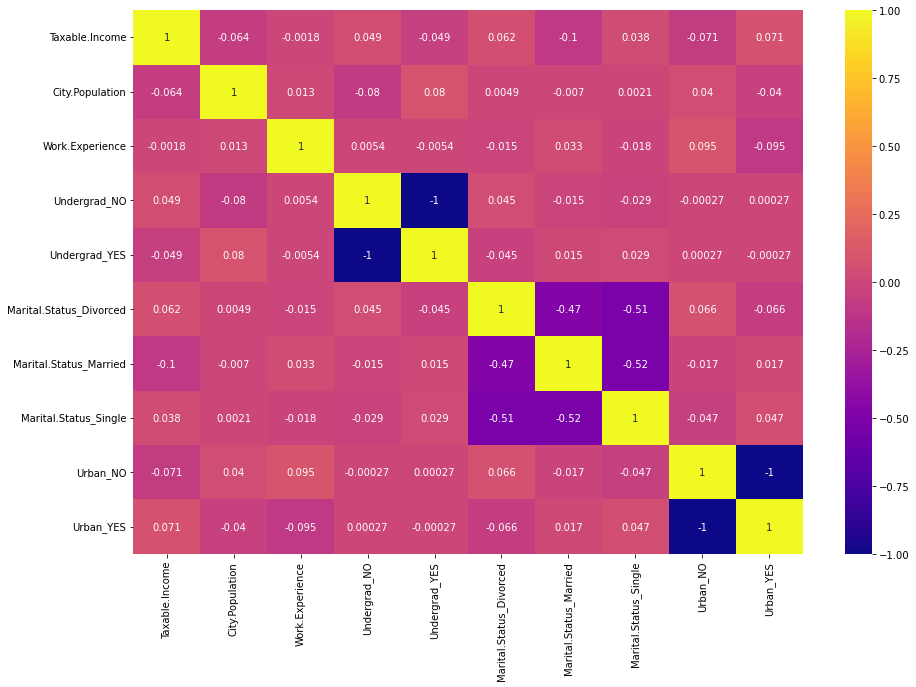

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(p, annot=True, cmap = 'plasma')

In [17]:
data1['Taxable.Income']=pd.cut(data1['Taxable.Income'], bins=[0, 30000, 100000], labels=['Risky', 'Good'])

In [18]:
data1.columns

Index(['Taxable.Income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [19]:
X = data1.iloc[:, 1:10]
Y = data1.iloc[:, 0]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [21]:
Y_train.value_counts()

Good     353
Risky     97
Name: Taxable.Income, dtype: int64

In [22]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
train_pred = model.predict(X_train)

In [24]:
accuracy_score(Y_train, train_pred)

1.0

In [25]:
confusion_matrix(Y_train, train_pred)

array([[353,   0],
       [  0,  97]], dtype=int64)

In [26]:
test_pred = model.predict(X_test)

In [27]:
accuracy_score(Y_test, test_pred)

0.6866666666666666

In [28]:
confusion_matrix(Y_test, test_pred)

array([[97, 26],
       [21,  6]], dtype=int64)

In [29]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_pred})

In [30]:
df

Actual Predicted
462  Risky      Good
345   Good      Good
74    Good      Good
445   Good      Good
177   Good      Good
..     ...       ...
371   Good     Risky
411   Good      Good
316   Good      Good
300   Good      Good
97    Good     Risky

[150 rows x 2 columns]

In [32]:
plt.figure(dpi=2000)
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()